# CC and IA trackers distribution analysis

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

In [4]:
df_cc = pd.read_csv("../RQX/10000sample_analysis/CC_2014_2019_trackers.csv",sep = "\t",names = ["year","url_domain","trackers_domain"])
df_cc

,year,url_domain,trackers_domain
0,2014,www.coloradotech.edu,"atomz,ctuonline,microsoft,coloradotech,cloudfr..."
1,2014,www.ombo.nsw.gov.au,"nsw,google-analytics,addthis,squiz"
2,2014,news.liga.net,"leta,orphus,sinoptik,ligazakon,lbi,google-anal..."
3,2014,immigrationforum.org,"salsalabs,immigrationforumaction,charitynaviga..."
4,2014,www.hum.leiden.edu,"facebook,leidenuniv,mastersinleiden,leiden,twi..."
...,...,...,...
48983,2019,www.membersfirstfl.org,"fontawesome,ncua,zipforhome,membersfirstfl,ezc..."
48984,2019,www.romhacking.net,"discord,google-analytics,romhacking,googleapis..."
48985,2019,chronicle.uchicago.edu,"feedburner,uchicago"
48986,2019,seoulbeats.com,"instagram,soundcloud,zazzles,wp,google-analyti..."


In [8]:
df_ia = pd.read_csv("../RQX/10000sample_analysis/IA_2014_2019_trackers.csv",sep = "\t",names = ["year","url_domain","trackers_domain"])
df_ia

,year,url_domain,trackers_domain
0,2014,beatthemicrobead.org,"noordzee,linkedin,twitter,unep,rijksoverheid,g..."
1,2014,news.liga.net,"twitter,sinoptik,google-analytics,solanocorp,j..."
2,2014,immigrationforum.org,"bbbimmigration,salsalabs,twitter,charitynaviga..."
3,2014,autismone.org,"leesilsby,twitter,icohare,ourkidsasd,homeopath..."
4,2014,satisfice.com,"123signup,linkedin,buccaneerscholar,google-ana..."
...,...,...,...
45944,2019,environment.sa.gov.au,"whiteribbon,reconciliationsa,twitter,clelandwi..."
45945,2019,wanderingearl.com,"google,twitter,wanderingearl,stripe,google-ana..."
45946,2019,chronicle.uchicago.edu,"uchicago,feedburner"
45947,2019,inbound.com,"inbound,twitter,google-analytics,hubspot,faceb..."


In [10]:
# get tracker number

def count_trackers(row):
    # if row is nan, return 0
    if row != row:
        return None
    return len(row.split(","))

df_ia["tracker_nums"] = df_ia['trackers_domain'].apply(count_trackers)
df_cc["tracker_nums"] = df_cc['trackers_domain'].apply(count_trackers)

In [13]:
print(df_ia["tracker_nums"].mean())
print(df_cc["tracker_nums"].mean())

10.618726191271804
11.243136497306116


In [17]:
df_ia.groupby("year").mean()

,tracker_nums
year,
2014,10.877809
2015,10.814815
2016,10.581952
2017,10.519500
2018,10.334978
2019,10.633518


In [18]:
df_cc.groupby("year").mean()

,tracker_nums
year,
2014,11.645748
2015,11.615417
2016,11.132775
2017,10.962022
2018,10.971814
2019,11.217517


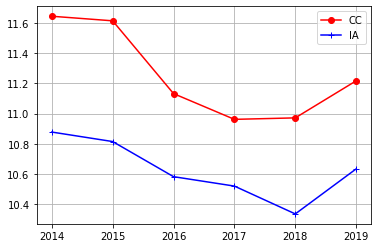

In [23]:
Year = list(range(2012,2022))

  
plt.plot(df_cc.groupby("year").mean(), color='red', marker='o',label = 'CC')
plt.plot(df_ia.groupby("year").mean(), color='blue', marker='+',label = "IA")
plt.legend()
plt.grid()


In [2]:

df_control = pd.read_csv("../dataset_archive/frame_control_count_whoexclude.csv",sep = '\t')
df_edu = pd.read_csv("../dataset_archive/frame_edu_count_whoexclude.csv",sep = '\t')
print(len(df_control))
print(len(df_edu))
df_control.head()

17975
17975


,control_domain,tracker_2012,tracker_2013,tracker_2014,tracker_2015,tracker_2016,tracker_2017,tracker_2018,tracker_2019,tracker_2020,tracker_2021
0,002mag.com,6,10,9,0,0,0,0,0,0,0
1,every-little.com,0,1,1,1,1,1,1,2,2,2
2,050plus-cp.com,0,0,5,5,1,0,0,0,0,0
3,080kiss.com,0,0,1,0,0,0,0,0,0,0
4,fc2.com,4,4,4,4,2,3,3,0,0,0


In [3]:
# sorted the dataframe by original rank
df_list = pd.read_csv("../resource/available-control-urls.txt",sep = '\t',names = ['edu','control','url_list'])
df_list.head()

,edu,control,url_list
0,jetaanc.org,judysoncherry.com,https://web.archive.org/web/20120616211759/htt...
1,concordsch.vic.edu.au,alexmac.biz,https://web.archive.org/web/20120607062709/htt...
2,lincoln.ox.ac.uk,umista.ca,https://web.archive.org/web/20120609100634/htt...
3,gosoutheast.com,ncip.gov.ph,https://web.archive.org/web/20120529131852/htt...
4,lalumiere.org,ashland.k12.or.us,https://web.archive.org/web/20120529131852/htt...


In [4]:
print(df_control['tracker_2021'].value_counts())
print((17975 - 4632) / 17975)
df_control['tracker_2021'].mean()

0     4632
1     3635
2     3172
3     2567
4     1611
5     1046
6      551
7      315
8      187
9      127
10      66
11      31
12      13
13      11
14       7
15       2
16       1
18       1
Name: tracker_2021, dtype: int64
0.7423087621696801


2.16778859527121

In [49]:
print(df_edu['tracker_2021'].value_counts().sort_index())
print((17975 - 3639) / 17975)
df_edu['tracker_2021'].mean()


0     3639
1     3330
2     3598
3     2836
4     1875
5     1168
6      701
7      453
8      203
9      101
10      44
11      14
12       8
13       3
14       1
18       1
Name: tracker_2021, dtype: int64
0.7975521557719054


2.39471488178025

In [53]:
dict_df_edu = df_edu['tracker_2021'].value_counts().sort_index().to_dict()
dict_df_control = df_control['tracker_2021'].value_counts().sort_index().to_dict()

dict_df_control[17] = 0
dict_df_edu[15] = 0
dict_df_edu[16] = 0
dict_df_edu[17] = 0

print(dict_df_edu)


{0: 3639, 1: 3330, 2: 3598, 3: 2836, 4: 1875, 5: 1168, 6: 701, 7: 453, 8: 203, 9: 101, 10: 44, 11: 14, 12: 8, 13: 3, 14: 1, 18: 1, 15: 0, 16: 0, 17: 0}


19
19


AttributeError: 'Rectangle' object has no property 'density'

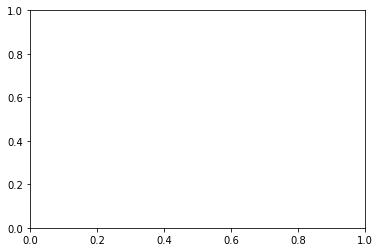

In [57]:
x1 = list(dict_df_control.keys())
y1 = list(dict_df_control.values())
x2 = list(dict_df_edu.keys())
y2 = list(dict_df_edu.values())

print(len(x1))
print(len(x2))
plt.bar(x1, y1, label="non-educationl websites", color="blue",density = True)
plt.bar(x2, y2, bottom=y1, label="educational websites", color="red",density = True)


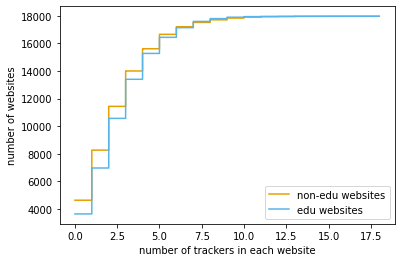

In [7]:
# distribution of the tracker number 


sns.histplot(df_control['tracker_2021'],bins=len(df_control),
                element="step", fill=False, cumulative=True, common_norm=False, label = "non-edu websites",color = "#E69F00")
sns.histplot(df_edu['tracker_2021'],bins=len(df_edu),
                element="step", fill=False, cumulative=True, common_norm=False, label = "edu websites", color = "#56B4E9");

plt.legend()             
plt.xlabel('number of trackers in each website')
plt.ylabel('number of websites')
plt.savefig("../images/section4/privacy_lost_cm.png",dpi = 200)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'number of websites')

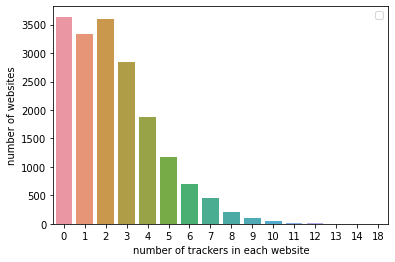

In [8]:
# draw bar
ax = plt.subplots()
ax = sns.barplot(y=df_edu['tracker_2021'].value_counts().values, x=df_edu['tracker_2021'].value_counts().index)

plt.legend()
plt.xlabel('number of trackers in each website')
plt.ylabel('number of websites')

<AxesSubplot:>

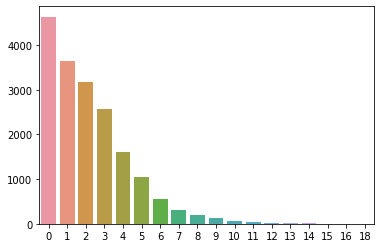

In [9]:
sns.barplot(y=df_control['tracker_2021'].value_counts().values, x=df_control['tracker_2021'].value_counts().index)


(array([8.267e+03, 5.739e+03, 2.657e+03, 8.660e+02, 1.870e+02, 1.930e+02,
        4.400e+01, 1.800e+01, 3.000e+00, 1.000e+00]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ]),
 <BarContainer object of 10 artists>)

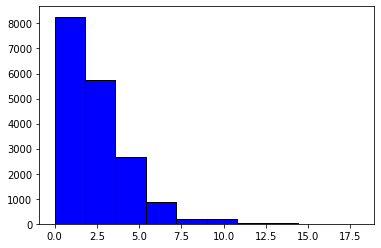

In [10]:
plt.hist(df_control['tracker_2021'],color = 'blue', edgecolor = 'black')

/home/wzm289/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tracker_2021'>

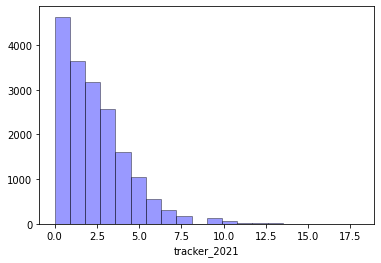

In [11]:
# seaborn histogram
sns.distplot(df_control['tracker_2021'], hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

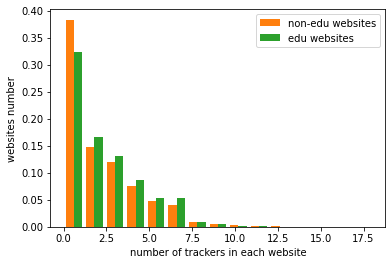

In [69]:
#  distribution comparision

colors=['tab:orange', 'tab:green']
names = ['non-edu websites','edu websites']
bars = plt.hist([df_control['tracker_2021'],df_edu['tracker_2021']],bins = 15,color=colors,label = names,density=True)
# print(list(bars[2][0]))
# for i in range(20):
#     plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
# plt.bar_label(bars[2][0],fmt='%.2f',padding = 2)
# plt.bar_label(bars[2][1],fmt='%.2f',padding = 2)
plt.legend()
plt.xlabel('number of trackers in each website')
plt.ylabel('websites number')
# plt.title('Side-by-Side Histogram with Multiple Airlines')
plt.savefig("../images/section4/privacy_lost.png",dpi = 200)

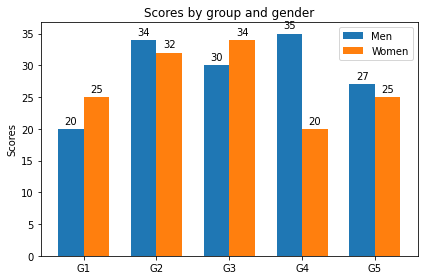

In [42]:
import numpy as np 
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Text(0, 0.5, 'Normalized websites number')

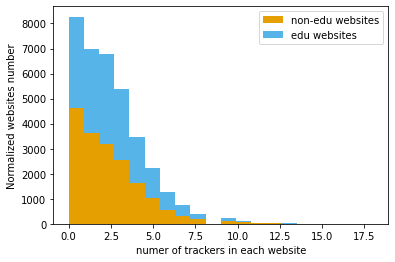

In [ ]:
plt.hist([df_control['tracker_2021'],df_edu['tracker_2021']], bins = 20, stacked=True,
        color = colors, label=names)
plt.legend()
plt.xlabel('numer of trackers in each website')
plt.ylabel('Normalized websites number')

<AxesSubplot:xlabel='tracker_2021', ylabel='Density'>

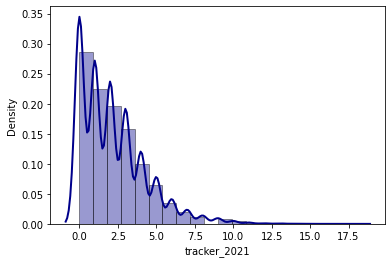

In [ ]:
# Density Plot and Histogram of all arrival delays
sns.distplot(df_control['tracker_2021'], hist=True, kde=True, 
             bins=20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

/home/wzm289/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/wzm289/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tracker_2021', ylabel='Density'>

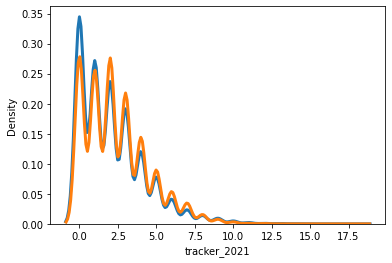

In [ ]:
# density plot
sns.distplot(df_control['tracker_2021'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "control set")
sns.distplot(df_edu['tracker_2021'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = "control set")               

In [ ]:
# change the dataframe

df = pd.concat([df_edu['tracker_2021'],df_control['tracker_2021']]).reset_index()
df['tracker_source'] = ['edu']*len(df_edu) + ['control']*len(df_control)
df

,index,tracker_2021,tracker_source
0,0,1,edu
1,1,0,edu
2,2,1,edu
3,3,4,edu
4,4,3,edu
...,...,...,...
35945,17970,0,control
35946,17971,2,control
35947,17972,0,control
35948,17973,0,control


## Cumulative Distribution


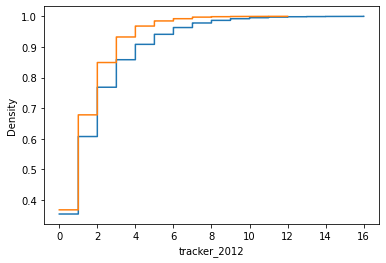

In [ ]:

sns.histplot(df_control['tracker_2012'],bins=len(df_control), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);
sns.histplot(df_edu['tracker_2012'],bins=len(df_edu), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False);            

<AxesSubplot:xlabel='tracker_2021', ylabel='Density'>

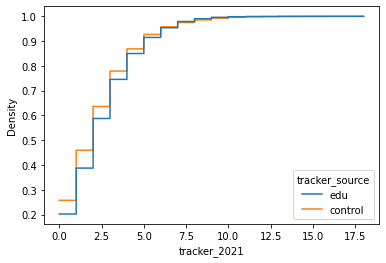

In [ ]:
sns.histplot(x='tracker_2021', data=df, hue='tracker_source', bins=len(df), stat="density",
             element="step", fill=False, cumulative=True, common_norm=False)

## Kolmogorov-Smirnov Test


In [ ]:
df_ks = pd.DataFrame()
df_ks[''] = np.sort(df['Income'].unique())
df_ks['F_control'] = df_ks['Income'].apply(lambda x: np.mean(income_c<=x))
df_ks['F_treatment'] = df_ks['Income'].apply(lambda x: np.mean(income_t<=x))
df_ks.head()

NameError: name 'np' is not defined

In [ ]:
from scipy.stats import kstest
stat, p_value = kstest(df_control['tracker_2021'], df_edu['tracker_2021'])
print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value={p_value}")

 Kolmogorov-Smirnov Test: statistic=0.0722, p-value=3.349128992374522e-41
